In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

# Define encoder
input_img = Input(shape=(28, 28, 1))  # Example for grayscale 28x28 images (like MNIST)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)  # Compressed latent representation

# Define decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Output layer

# Define autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the autoencoder with 10 epochs
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 108s 460ms/step - loss: 0.0758 - val_loss: 0.0736
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 109s 464ms/step - loss: 0.0742 - val_loss: 0.0729
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 463ms/step - loss: 0.0730 - val_loss: 0.0716
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 108s 459ms/step - loss: 0.0721 - val_loss: 0.0710
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 154s 510ms/step - loss: 0.0717 - val_loss: 0.0707
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 134s 476ms/step - loss: 0.0712 - val_loss: 0.0702
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 478ms/step - loss: 0.0705 - val_loss: 0.0696
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 145s 491ms/step - loss: 0.0701 - val_loss: 0.0693
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 490ms/step - loss: 0.0699 - val_loss: 0.0691
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 112s 474ms/step - loss: 0.0697 - val_loss: 0.0688


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


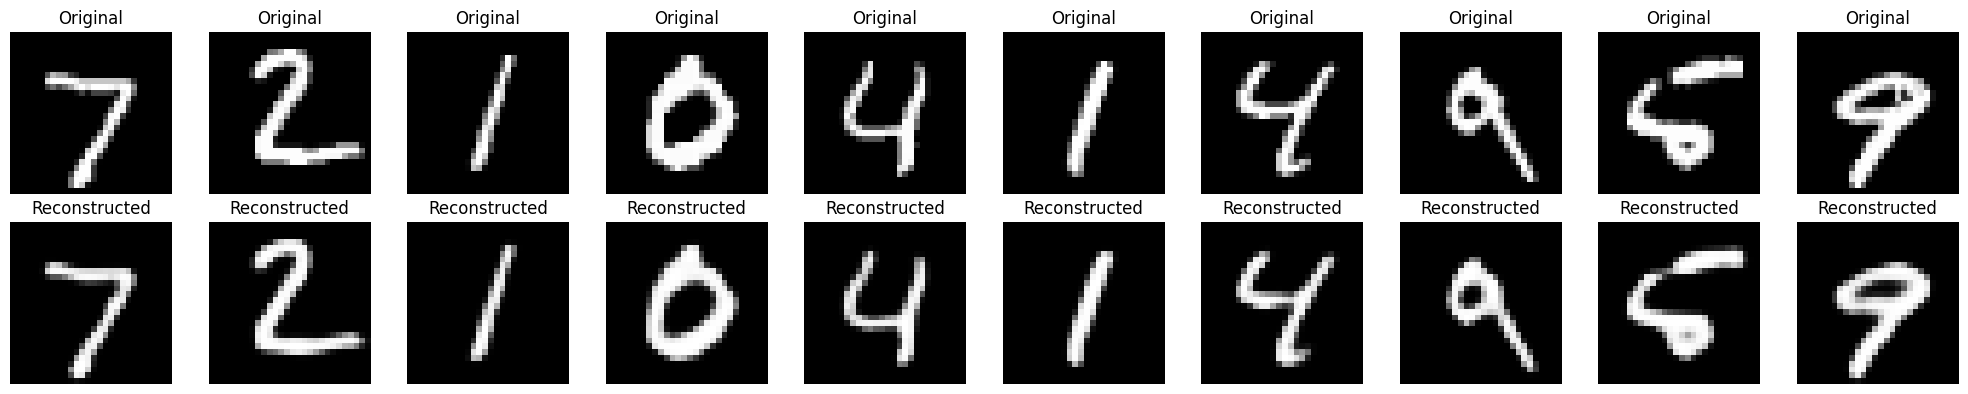

Reconstruction Error (MSE): 0.0027872215


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Encode and decode test images
decoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.set_title("Original")
    ax.axis("off")

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.set_title("Reconstructed")
    ax.axis("off")

plt.tight_layout()
plt.show()

# Calculate and print the reconstruction error
reconstruction_error = np.mean(np.square(x_test - decoded_imgs))
print("Reconstruction Error (MSE):", reconstruction_error)
